In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from scipy import stats

In [2]:
df = pd.read_csv('survey_results_public.csv',
                        usecols=['CodeRevHrs', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'Age'],)


In [3]:
df.corr()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,0.068370,-0.012694,-0.026039,0.014145
ConvertedComp,0.068370,1.000000,0.001667,-0.064162,0.085386
WorkWeekHrs,-0.012694,0.001667,1.000000,0.020085,0.014590
CodeRevHrs,-0.026039,-0.064162,0.020085,1.000000,-0.041303
Age,0.014145,0.085386,0.014590,-0.041303,1.000000


In [4]:
df_sd = df[np.abs(df - df.mean()) <= 3*df.std()]

df_sd.isna().sum()
df_sd = df_sd.dropna()

In [5]:
df_sd

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
8,138000.0,95179.0,32.0,12.0,23.0
12,90000.0,90000.0,40.0,5.0,28.0
13,4150.0,57060.0,40.0,4.0,31.0
16,90000.0,65277.0,45.0,5.0,29.0
18,9500.0,31140.0,8.0,3.0,31.0
...,...,...,...,...,...
2988,100000.0,18336.0,40.0,2.0,30.0
2989,500000.0,6996.0,40.0,5.0,24.0
2990,4600.0,8184.0,9.0,5.0,23.0
2995,23000.0,75876.0,45.0,3.0,29.0


In [6]:
df.corr()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,0.068370,-0.012694,-0.026039,0.014145
ConvertedComp,0.068370,1.000000,0.001667,-0.064162,0.085386
WorkWeekHrs,-0.012694,0.001667,1.000000,0.020085,0.014590
CodeRevHrs,-0.026039,-0.064162,0.020085,1.000000,-0.041303
Age,0.014145,0.085386,0.014590,-0.041303,1.000000


In [7]:
df_sd.corr()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,-0.036394,-0.023526,-0.026279,0.020675
ConvertedComp,-0.036394,1.000000,0.062595,-0.064897,0.151638
WorkWeekHrs,-0.023526,0.062595,1.000000,0.118773,0.107978
CodeRevHrs,-0.026279,-0.064897,0.118773,1.000000,-0.040753
Age,0.020675,0.151638,0.107978,-0.040753,1.000000


In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_q = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

CompTotal        103000.0
ConvertedComp     73330.0
WorkWeekHrs           5.0
CodeRevHrs            4.0
Age                  11.0
dtype: float64


In [9]:
df.corr()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,0.068370,-0.012694,-0.026039,0.014145
ConvertedComp,0.068370,1.000000,0.001667,-0.064162,0.085386
WorkWeekHrs,-0.012694,0.001667,1.000000,0.020085,0.014590
CodeRevHrs,-0.026039,-0.064162,0.020085,1.000000,-0.041303
Age,0.014145,0.085386,0.014590,-0.041303,1.000000


In [10]:
df_sd.corr()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,-0.036394,-0.023526,-0.026279,0.020675
ConvertedComp,-0.036394,1.000000,0.062595,-0.064897,0.151638
WorkWeekHrs,-0.023526,0.062595,1.000000,0.118773,0.107978
CodeRevHrs,-0.026279,-0.064897,0.118773,1.000000,-0.040753
Age,0.020675,0.151638,0.107978,-0.040753,1.000000


In [11]:
df_q.corr()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,0.673137,0.101053,-0.031676,0.243849
ConvertedComp,0.673137,1.000000,0.056575,-0.037741,0.379306
WorkWeekHrs,0.101053,0.056575,1.000000,0.121566,0.018298
CodeRevHrs,-0.031676,-0.037741,0.121566,1.000000,-0.007759
Age,0.243849,0.379306,0.018298,-0.007759,1.000000


In [12]:
df.describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,1.904000e+03,1.900000e+03,2200.000000,1740.000000,2669.000000
mean,3.300406e+09,1.292020e+05,42.818841,4.890282,30.378194
std,1.439500e+11,2.923400e+05,26.378027,4.713350,8.826576
min,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,2.000000e+04,2.667000e+04,40.000000,2.000000,24.000000
50%,6.500000e+04,5.773200e+04,40.000000,4.000000,29.000000
75%,1.230000e+05,1.000000e+05,45.000000,6.000000,35.000000
max,6.281239e+12,2.000000e+06,475.000000,54.000000,73.000000


In [13]:
df_sd.describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,1.290000e+03,1290.000000,1290.000000,1290.000000,1290.000000
mean,1.980549e+06,97092.787597,40.599574,4.381078,31.265891
std,2.009753e+07,155324.287518,8.495784,3.138711,7.177123
min,0.000000e+00,0.000000,4.000000,0.000000,17.000000
25%,2.800000e+04,29547.000000,40.000000,2.000000,26.000000
50%,7.000000e+04,59826.000000,40.000000,4.000000,30.000000
75%,1.300000e+05,103000.000000,44.000000,5.000000,35.000000
max,4.500000e+08,1000000.000000,98.000000,18.000000,56.000000


In [14]:
df_q.describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,1280.000000,1277.000000,1494.000000,1196.000000,1972.000000
mean,63876.481250,66893.708692,41.033266,4.180468,29.414554
std,52414.575302,44284.607684,3.656716,2.699862,7.716316
min,0.000000,0.000000,33.000000,0.000000,12.000000
25%,15000.000000,33000.000000,40.000000,2.000000,24.000000
50%,56000.000000,59579.000000,40.000000,4.000000,28.000000
75%,97000.000000,91660.000000,42.000000,5.000000,34.000000
max,275000.000000,209931.000000,52.000000,12.000000,51.000000


In [15]:
df_sd.ConvertedComp.mean()

97092.78759689923

In [16]:
df_sd.ConvertedComp.max()

1000000.0

In [17]:
df_sd.ConvertedComp.min()

0.0

In [18]:
df_sd.ConvertedComp.sum()

125249696.0

In [19]:
df.ConvertedComp.mean()

129201.97736842105

In [20]:
df.ConvertedComp.max()

2000000.0

In [21]:
df.ConvertedComp.min()

0.0

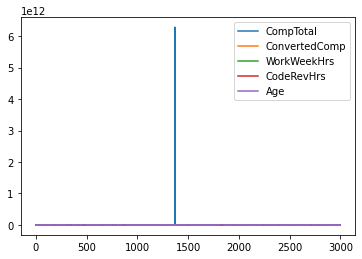

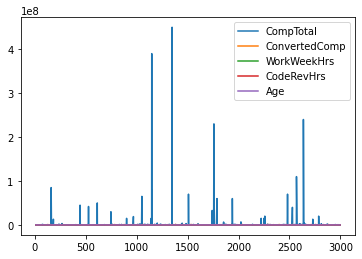

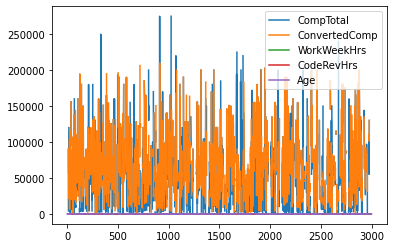

In [22]:
df.plot()
plt.show();
df_sd.plot()
plt.show();
df_q.plot()
plt.show();

In [23]:
df_q.describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,1280.000000,1277.000000,1494.000000,1196.000000,1972.000000
mean,63876.481250,66893.708692,41.033266,4.180468,29.414554
std,52414.575302,44284.607684,3.656716,2.699862,7.716316
min,0.000000,0.000000,33.000000,0.000000,12.000000
25%,15000.000000,33000.000000,40.000000,2.000000,24.000000
50%,56000.000000,59579.000000,40.000000,4.000000,28.000000
75%,97000.000000,91660.000000,42.000000,5.000000,34.000000
max,275000.000000,209931.000000,52.000000,12.000000,51.000000


In [24]:
df = pd.read_csv('survey_results_public.csv',
                        usecols=['CodeRevHrs', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'Age', 'WorkLoc' , 'Hobbyist'],)

In [25]:
df[:3]

,Hobbyist,CompTotal,ConvertedComp,WorkWeekHrs,WorkLoc,CodeRevHrs,Age
0,Yes,NaN,NaN,NaN,NaN,NaN,14.0
1,No,NaN,NaN,NaN,NaN,NaN,19.0
2,Yes,23000.0,8820.0,40.0,Home,NaN,28.0


In [26]:
df.replace(to_replace='Yes', value='1', inplace=True)
df.replace(to_replace='No', value='0', inplace=True)

In [27]:
df[:3]

,Hobbyist,CompTotal,ConvertedComp,WorkWeekHrs,WorkLoc,CodeRevHrs,Age
0,1,NaN,NaN,NaN,NaN,NaN,14.0
1,0,NaN,NaN,NaN,NaN,NaN,19.0
2,1,23000.0,8820.0,40.0,Home,NaN,28.0


In [28]:
column_values = df[['WorkLoc']].values.ravel()
unique_values = pd.unique(column_values)
print(unique_values)

[nan 'Home' 'Office' 'Other place, such as a coworking space or cafe']


In [29]:
one_hot = pd.get_dummies(df['WorkLoc'])

In [30]:
df = df.drop('WorkLoc',axis=1)

In [31]:
df = df.join(one_hot)

In [32]:
df[:3]

,Hobbyist,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,Home,Office,"Other place, such as a coworking space or cafe"
0,1,NaN,NaN,NaN,NaN,14.0,0,0,0
1,0,NaN,NaN,NaN,NaN,19.0,0,0,0
2,1,23000.0,8820.0,40.0,NaN,28.0,1,0,0


In [33]:
df_q = df_q.dropna()

In [34]:
df_q.corr()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,0.633843,0.116972,-0.029208,0.218627
ConvertedComp,0.633843,1.000000,0.080254,-0.040247,0.379503
WorkWeekHrs,0.116972,0.080254,1.000000,0.123336,0.026716
CodeRevHrs,-0.029208,-0.040247,0.123336,1.000000,-0.008009
Age,0.218627,0.379503,0.026716,-0.008009,1.000000


In [35]:
df_q.describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,916.000000,916.000000,916.000000,916.000000,916.000000
mean,67902.669214,71256.197598,40.879039,4.143384,31.271834
std,53142.958126,45154.459468,3.584673,2.689594,6.828045
min,0.000000,0.000000,33.000000,0.000000,17.000000
25%,21750.000000,37349.000000,40.000000,2.000000,26.000000
50%,60500.000000,63876.000000,40.000000,4.000000,30.000000
75%,100000.000000,98000.000000,40.000000,5.000000,35.000000
max,275000.000000,209931.000000,52.000000,12.000000,51.000000


In [36]:
reg = linear_model.LinearRegression()
reg.fit(df_q[['Age']], df_q['ConvertedComp'])

LinearRegression()

In [37]:
reg.predict([[20]])

array([42967.41433255])

In [38]:
reg.predict([[30]])

array([68064.29130241])

In [39]:
reg.predict([[40]])

array([93161.16827228])

In [40]:
reg = linear_model.LinearRegression()
reg.fit(df_q[['Age', 'CodeRevHrs']], df_q['ConvertedComp'])

LinearRegression()

In [41]:
reg.coef_

array([2507.71689377, -624.694861  ])

In [42]:
reg.predict(df_q[['Age', 'CodeRevHrs']])

array([ 62516.24061108,  70664.08615338,  65023.95750485,  45595.85466549,
        79436.62655668,  74421.19276914,  54993.08992978,  82881.38574194,
        46211.61207672, 103889.10063334,  98873.66684581,  58134.43913432,
        97008.51971258, 107646.2072491 ,  48094.63410948,  39937.85111741,
        85085.69265498,  58134.43913432,  36823.31426219,  52485.37303602,
        74421.19276914,  66915.91698739,  54377.33251856,  79454.50145622,
        56242.47965178,  81944.34345044,  61882.60830031,  67531.67439861,
        57491.86937378,  76928.90966291,  59062.54397605,  47461.00179871,
        66915.91698739,  89467.49413174,  55626.72224055,  59374.89140655,
        52485.37303602,  80070.25886745,  75045.88763014,  79454.50145622,
        69405.75898161,  74108.84533864,  54368.39506878,  54359.45761901,
        50611.28845302,  82577.97576121, 110787.55645364,  64390.32519408,
        86977.65213752,  83827.36548321,  65023.95750485,  80694.95372844,
       101381.38373957, 1

In [43]:
from sklearn.metrics import mean_squared_error

In [45]:
reg = linear_model.LinearRegression()
reg.fit(df_q[['Age']], df_q['ConvertedComp'])


LinearRegression()

In [52]:
y_true = df_q['ConvertedComp']
y_pred = reg.predict(df_q[['Age']])
mean_squared_error(y_true, y_pred)

1743368452.6223035

In [53]:
reg = linear_model.LinearRegression()
reg.fit(df_q[['Age', 'CodeRevHrs']], df_q['ConvertedComp'])

LinearRegression()

In [54]:
y_true = df_q['ConvertedComp']
y_pred = reg.predict(df_q[['Age', 'CodeRevHrs']])
mean_squared_error(y_true, y_pred)

1740548726.1463165